<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>

Евгений, доброго дня! рад приветствовать тебя вновь) <br />
(а дальше шаболонная обязательная часть, как ты заметил по другим спринтам)
<br />
Меня зовут Николай Шавлюго. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха) И очень здорово будет, если тебе удастся задавать вопросы, да и вообще - всячески доставать меня, если я по каким-то причинам не приму проект:) При этом, из своего опыта скажу, хорошо и важно, когда переписка ревьюера и студента - сохраняется на следующие проекты и даже на будущую практическую деятельность.<br>
<BR> В ПУТЬ!<br>

In [1]:
# установим пакет Plotly, при необходимости (для Яндекс Практикум)
!pip install cufflinks plotly -U

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: cufflinks in /home/jovyan/.local/lib/python3.7/site-packages (0.17.3)
Requirement already up-to-date: plotly in /home/jovyan/.local/lib/python3.7/site-packages (4.14.3)


In [ ]:
#!pip install lightgbm


In [2]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
sns.set()
import time

In [3]:
#Игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')

#базовые библиотеки машинного обучения
from scipy import stats as st 

from sklearn.metrics import roc_curve, roc_auc_score, r2_score, mean_absolute_error, make_scorer, mean_squared_error

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

from lightgbm import LGBMRegressor 

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit

from sklearn.utils import shuffle


In [4]:
pd.options.plotting.backend = "matplotlib"
import plotly.graph_objs as go
import cufflinks as cf
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Инструкция по выполнению проекта

Чтобы усилить исследование, не ограничивайтесь градиентным бустингом. Попробуйте более простые модели — иногда они работают лучше. Это редкие случаи, которые легко пропустить, если всегда применять только бустинг. Поэкспериментируйте и сравните характеристики моделей: скорость работы, точность результата.  
Загрузите и подготовьте данные.  
Обучите разные модели. Для каждой попробуйте различные гиперпараметры.  
Проанализируйте скорость работы и качество моделей.  

Примечания:  
Для оценки качества моделей применяйте метрику RMSE.  
Самостоятельно освойте библиотеку LightGBM и её средствами постройте модели градиентного бустинга.  
Время выполнения ячейки кода Jupyter Notebook можно получить специальной командой. Найдите её.  
Поскольку модель градиентного бустинга может обучаться долго, измените у неё только два-три параметра.  
Если перестанет работать Jupyter Notebook, удалите лишние переменные оператором del:  
del features_train   
Описание данных  
Данные находятся в файле /datasets/autos.csv.  
Признаки

DateCrawled — дата скачивания анкеты из базы  
VehicleType — тип автомобильного кузова  
RegistrationYear — год регистрации автомобиля  
Gearbox — тип коробки передач  
Power — мощность (л. с.)  
Model — модель автомобиля  
Kilometer — пробег (км)  
RegistrationMonth — месяц регистрации автомобиля  
FuelType — тип топлива  
Brand — марка автомобиля  
NotRepaired — была машина в ремонте или нет  
DateCreated — дата создания анкеты  
NumberOfPictures — количество фотографий автомобиля  
PostalCode — почтовый индекс владельца анкеты (пользователя)  
LastSeen — дата последней активности пользователя  

Целевой признак  

Price — цена (евро)  


## Подготовка данных

### Первичный анализ

In [5]:

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [6]:
def view_nan(df1): 
    plt.figure(figsize=(15,7))
    # определяем цвета 
    # желтый - пропущенные данные, синий - не пропущенные
    colours = ['#000099', '#ffff00'] 
    sns.heatmap(df1[list(df1)].isnull(), cmap=sns.color_palette(colours))
    
   
    return  missing_values_table(df1)   

In [7]:
def view_zero(df1): 
        
    # выведем проценты пропусков 
    nan_list = [] 
    columns_list = []
    pct_list = []
    
    for col in df1.columns:
        pct_missing = np.mean(df1[col]==0)
        pct_missing_sum = (df1[col]== 0).sum()
        if pct_missing_sum > 0:
            nan_list.append(pct_missing_sum)
            columns_list.append(col)
            pct_list.append(pct_missing*100)
            #print(f'{pct_missing_sum} пропуска в {col} -  составляют -{pct_missing:.2%}')
    return  pd.DataFrame({'column': columns_list, 'zero': nan_list, 'pct': pct_list})  

In [8]:
df = pd.read_csv("/datasets/autos.csv")
#df = pd.read_csv("autos.csv")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [10]:
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, данные на базе)

Сразу преобразуем датавремя

In [11]:
df["DateCrawled"] = pd.to_datetime(df["DateCrawled"])
df["DateCreated"] = pd.to_datetime(df["DateCreated"])
df["LastSeen"] = pd.to_datetime(df["LastSeen"])


In [12]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [13]:
df.describe(include=['object', 'datetime'])

,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,271174,8,2,250,7,40,2,109,179150
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,91457,268251,29232,216352,77013,247161,13719,17
first,2016-03-05 14:06:22,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-10 00:00:00,2016-03-05 14:15:08
last,2016-04-07 14:36:58,NaN,NaN,NaN,NaN,NaN,NaN,2016-04-07 00:00:00,2016-04-07 14:58:51


Проблемы в дате регистрации авто. отбросим все автомобили с годом регистрации больше даты составления анкеты, затем уберем выброс 


In [14]:
df=df[df.RegistrationYear<=pd.DatetimeIndex(df.DateCreated).year.max()]
#
# Подсчет первого и третьего квартиля
first_quartile = df['RegistrationYear'].describe()['25%']
third_quartile = df['RegistrationYear'].describe()['75%']


iqr = third_quartile - first_quartile

# Удаление выбросов
df = df[(df['RegistrationYear'] > (first_quartile - 3 * iqr)) &
            (df['RegistrationYear'] < (third_quartile + 3 * iqr))]
df.RegistrationYear.min()

1976

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
С отсечками - верная идея:<br>
1) последняя дата регистрации на сайте - 2016 год. Значит всё что больше 2016 - аномалии..- верно подметил!<br>
2) нижняя отсечка 1976: тут с бизнесом можно пообщаться на предемет - какие машины на сервисе будут. Ретро, супер ретро, люьые или только не старше 40 , например. Ну и исходя из этого - выставлять отсечку.<br>
Т.е. не только статистическая аргументация может понадобиться..

Введем новый признак срок эксплуатации авто на момент подачи объявления, затем из данных удалим все остальные солбцы датавремя? т.к. последние  анкеты были в 2016 году. 

In [15]:
df['age_auto']= pd.DatetimeIndex(df.DateCreated).year-df.RegistrationYear + 1

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ОК, отличная фича!

In [16]:
df.drop(['DateCrawled', 'DateCreated', 'LastSeen', 'RegistrationYear'], axis=1, inplace=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>с дропом - ОК. Кстати говоря, фактор "PostCode" - тоже можно удалить. Это просто набор цифр в данной интерпретации. Слишком много категоий получается. Можно, правда, попробовать оставить 1-2 первые цифры от почнового кода... тогда категорий будет меньше. И для модели - уже интереснее..

Проверим пропуски

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
NotRepaired,63909,18.9
FuelType,26658,7.9
VehicleType,22542,6.7
Gearbox,17298,5.1
Model,16934,5.0


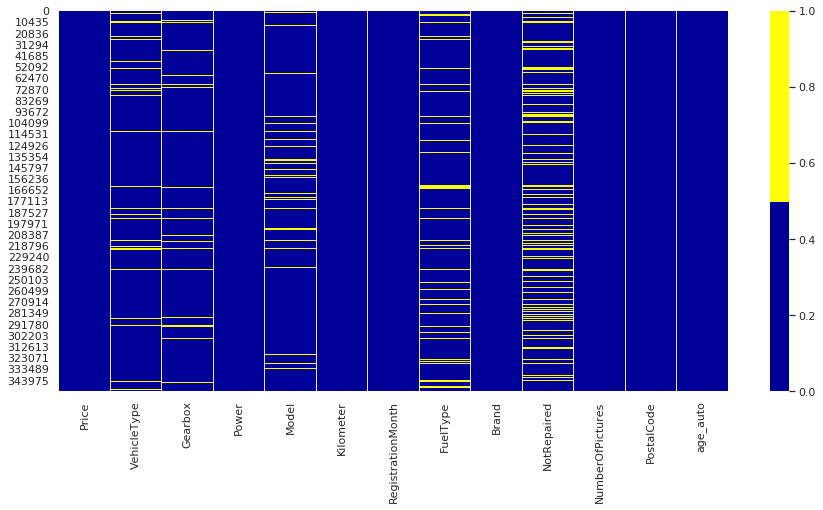

In [17]:
view_nan(df)

Столбец Model, NumberOfPictures, PostalCode для упрощения удалим из модели 


остальные заменим модой (как вариант удаление строк и сравнение в точности модели)

Топ наиболее часто по почтовому коду

plt.figure(figsize=(12,8))  
df.PostalCode.value_counts().nlargest(20).plot(kind='bar')  
plt.xlabel('City Frequency')  
plt.title("Frequency of TOP 20 city distribution",fontsize=18)  
plt.show()

In [18]:
df.drop(['Model'], axis=1, inplace=True)
df.drop(['NumberOfPictures'], axis=1, inplace=True)
df.drop(['PostalCode'], axis=1, inplace=True)
#df.dropna(inplace=True)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ок, поддерживаю.

Заменим пропуски на наиболее часто встречающееся


In [19]:
df.NotRepaired.fillna((df.NotRepaired.value_counts().idxmax()), inplace=True)
df.FuelType.fillna((df.FuelType.value_counts().idxmax()), inplace=True)
df.VehicleType.fillna((df.VehicleType.value_counts().idxmax()), inplace=True)
df.Gearbox.fillna((df.Gearbox.value_counts().idxmax()), inplace=True)
# Вариант
# df.Model.fillna('other', inplace=True)
#df.VehicleType.fillna('other', inplace=True)
#df.FuelType.fillna('other', inplace=True)


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>С категориаьными факторами, т.е. пропусками в них: действиетльно, подчас непросто их заполнить. И выход - подстановка новой категории "неизвестно" ("другое") часто видится более оправданным. Или удалить). <br>
    
На мой взгляд, не всегда тип подстановки модой - лучший вариант для категориальных данных.<br>
например про коробку передач: модой является - manual. А если пропущенные данные - это все новые авто? а они, чаще всего, комплектуются автоматической коробкой... И тогда мы внесём собственными руками в модель ошибку. КОторая в итоге выльется в ошибку предсказания цены.

In [20]:
df.head()

,Price,VehicleType,Gearbox,Power,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,age_auto
0,480,sedan,manual,0,150000,0,petrol,volkswagen,no,24
1,18300,coupe,manual,190,125000,5,gasoline,audi,yes,6
2,9800,suv,auto,163,125000,8,gasoline,jeep,no,13
3,1500,small,manual,75,150000,6,petrol,volkswagen,no,16
4,3600,small,manual,69,90000,7,gasoline,skoda,no,9


In [21]:
# проверим на значение 0
view_zero(df)

,column,zero,pct
0,Price,9782,2.900063
1,Power,35549,10.539189
2,RegistrationMonth,33032,9.792975


Price и Power скорректируем. RegistrationMonth оставим 0, будем считать что не известен месяц.

Удалим строки со значением цены равной 0

In [23]:
# удаление 0
df = df[df['Price'] > 0]  #& (df['Power'] >0)]


In [24]:
px.box(df.Power)

In [24]:
# убуерем выбросы и  0 Power
# Подсчет первого и третьего квартиля
first_quartile =df['Power'].describe()['25%']
third_quartile = df['Power'].describe()['75%']

iqr = third_quartile - first_quartile

# Удаление выбросов
df = df[df['Power'] < (third_quartile + 3 * iqr)]

# Замена Мощности 0 на среднее
# df.Power = df.Power.map( lambda x : df.Power.median() if x == 0 else x )

df.loc[df['Power']==0,'Power']= round(df.Power.mean())


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Как и писал выше - есть таой ещё подход: совместно со статистическим анализом проводить бизнес-анализ данных. Т.е. подключать понимание рынка и на этом понимании устанавливать отсечки. И также,оставлять ссылки на источник знаний по границам отсечек, чтобы это не выглядело, будто бы решение принимал аналитик исключительно от себя)

In [25]:
df["Gearbox"] = (df["Gearbox"] == "auto").astype("int")
df["NotRepaired"] = (df["NotRepaired"] == "yes").astype("int")

проверим на дупликаты и удалим

In [26]:
df.duplicated().sum()

33242

In [27]:
df = df.drop_duplicates().reset_index(drop=True)
print(df.duplicated().sum())

0


In [28]:
df.head(10)

,Price,VehicleType,Gearbox,Power,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,age_auto
0,480,sedan,0,108,150000,0,petrol,volkswagen,0,24
1,18300,coupe,0,190,125000,5,gasoline,audi,1,6
2,9800,suv,1,163,125000,8,gasoline,jeep,0,13
3,1500,small,0,75,150000,6,petrol,volkswagen,0,16
4,3600,small,0,69,90000,7,gasoline,skoda,0,9
5,650,sedan,0,102,150000,10,petrol,bmw,1,22
6,2200,convertible,0,109,150000,8,petrol,peugeot,0,13
7,14500,bus,0,125,30000,8,petrol,ford,0,3
8,999,small,0,101,150000,0,petrol,volkswagen,0,19
9,2000,sedan,0,105,150000,12,petrol,mazda,0,13


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293291 entries, 0 to 293290
Data columns (total 10 columns):
Price                293291 non-null int64
VehicleType          293291 non-null object
Gearbox              293291 non-null int64
Power                293291 non-null int64
Kilometer            293291 non-null int64
RegistrationMonth    293291 non-null int64
FuelType             293291 non-null object
Brand                293291 non-null object
NotRepaired          293291 non-null int64
age_auto             293291 non-null int64
dtypes: int64(7), object(3)
memory usage: 22.4+ MB


### Визуализация данных


Для лучшего понимания произведем визуализацию данных

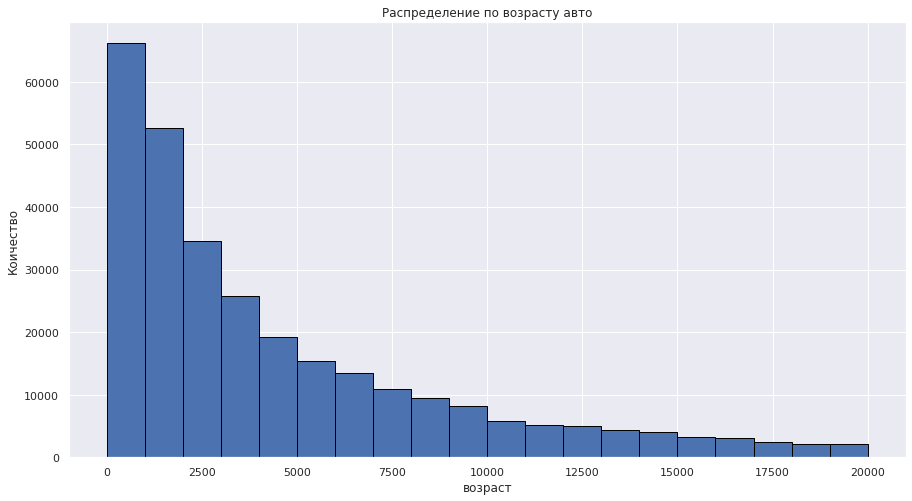

In [30]:
plt.figure(figsize=(15, 8))
plt.hist(df['Price'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('возраст'); 
plt.ylabel('Коичество'); plt.title('Распределение по возрасту авто');


In [31]:
# Посмотрим на корелляцию от цены и отсортируем 
correlations_data = df.corr()['Price'].sort_values()


print(correlations_data, '\n')



age_auto            -0.521811
Kilometer           -0.351627
NotRepaired         -0.194621
RegistrationMonth    0.091029
Gearbox              0.248894
Power                0.496132
Price                1.000000
Name: Price, dtype: float64 



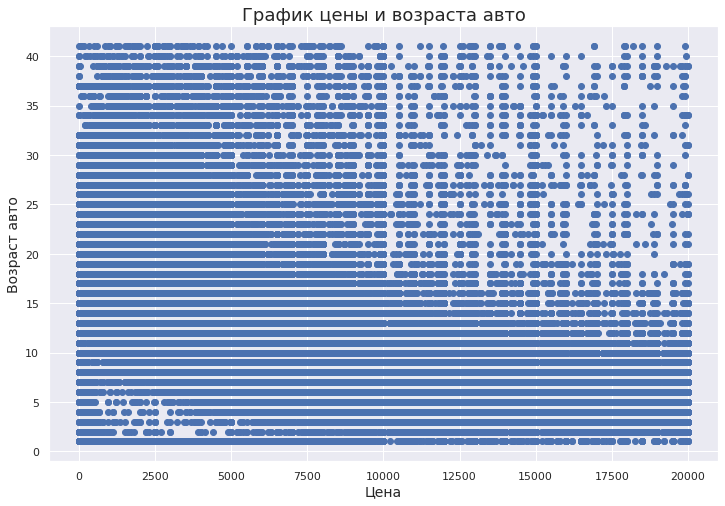

In [32]:

plt.figure(figsize=(12, 8))

plt.scatter(df.Price, df.age_auto)
plt.xlabel("Цена", fontsize=14)
plt.ylabel("Возраст авто", fontsize=14)
plt.title("График цены и возраста авто",fontsize=18)
plt.show()

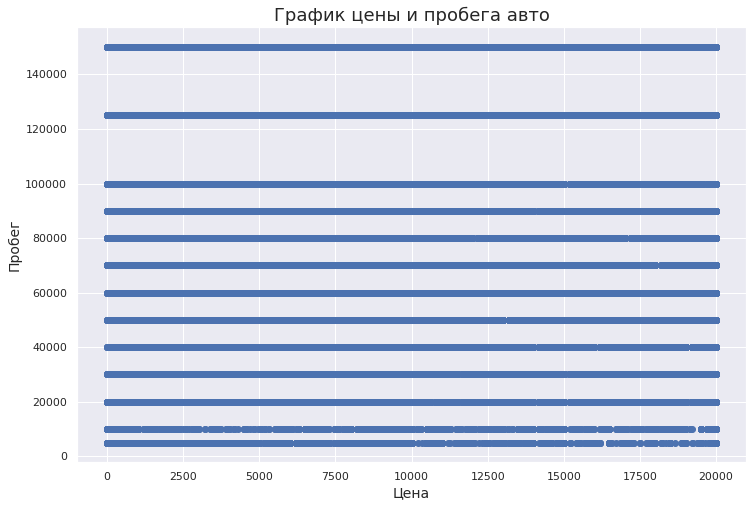

In [33]:

plt.figure(figsize=(12, 8))

plt.scatter(df.Price, df.Kilometer)
plt.xlabel("Цена", fontsize=14)
plt.ylabel("Пробег", fontsize=14)
plt.title("График цены и пробега авто",fontsize=18)
plt.show()

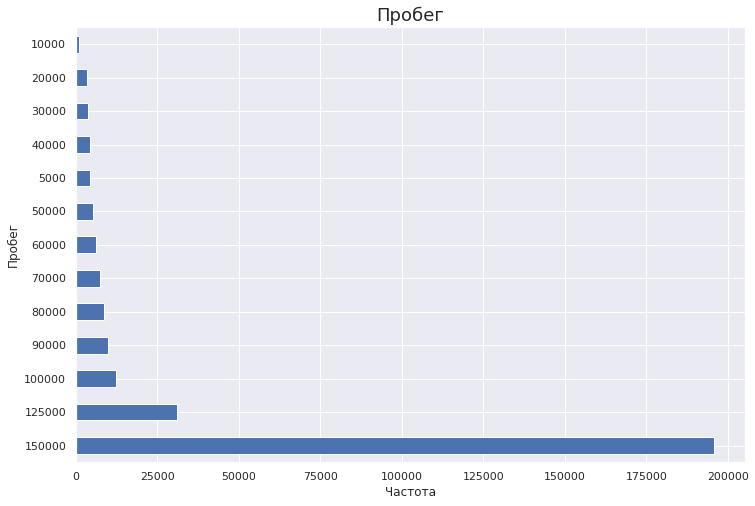

In [34]:
plt.figure(figsize=(12,8))
df.Kilometer.value_counts().plot(kind='barh')
plt.xlabel('Частота')
plt.ylabel('Пробег')
plt.title("Пробег",fontsize=18)
plt.show()

In [ ]:

fig = px.box(df, x='Price', y='FuelType', title='Тип двигателя')

fig.show()

In [ ]:
plt.figure(figsize=(12, 8))

plt.scatter(df.Price, df.Power, c='orange', marker='x')
plt.xlabel("Цена", fontsize=14)
plt.ylabel("Мощность", fontsize=14)
plt.title("График цены и мощности",fontsize=18)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.stripplot(data = df, x='Price', y='Brand', jitter=.1)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
df.Brand.value_counts().nlargest(20).plot(kind='barh')
plt.xlabel('Частота')
plt.title("частота TOP 20 бренда",fontsize=18)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(data = df, x='VehicleType', y='Price')
plt.title("График цены и типа авто",fontsize=18)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data = df, x='RegistrationMonth', y='Price')
plt.title("График цены и месяца регистрации",fontsize=18)
plt.show()

In [ ]:
f, ax = plt.subplots(figsize=(10, 4))
sns.violinplot(data = df, x='Gearbox', y='Price')
plt.title("График распределения цены и типа коробки передач",fontsize=18)
plt.show()


In [ ]:
f, ax = plt.subplots(figsize=(10, 4))
sns.stripplot(data = df, x='NotRepaired', y='Price', jitter=.5)
plt.title("График распределения цены и ремонта",fontsize=18)
plt.show()

In [31]:
df = df.reset_index(drop=True)
df.head()


,Price,VehicleType,Gearbox,Power,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,age_auto
0,480,sedan,0,108,150000,0,petrol,volkswagen,0,24
1,18300,coupe,0,190,125000,5,gasoline,audi,1,6
2,9800,suv,1,163,125000,8,gasoline,jeep,0,13
3,1500,small,0,75,150000,6,petrol,volkswagen,0,16
4,3600,small,0,69,90000,7,gasoline,skoda,0,9


### Вывод

Данные были очищенны от дубликатов, пропуски замененны на наимболее часто встречающиеся значения или значение other. Типы дынных соответствуют представленным признакам, но были определены типы данных у дат: DateCrawled, DateCreated, LastSeen. Удалены из сета данных признаки не позволяющие однозначно себя трактовать и временные ряды, т.к. модели не могут их обработать

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>Хорошо тебе удалось поработать с данными в этом разделе. Ничего не упустил, на мой взгляд. И подходы по реализации - интересные.

## Обучение моделей

Проверим 3 модели: RandomForestRegressor, CatBoost, LightGBM.
Для каждой моделии найдем лучшие гиперпараметры, проверим на целых данных и с кросс валидацией и измерим время обучения на train
Сведем данные по всем моделям в 1 таблицу

In [36]:
rmse_func = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))
rmsle  = make_scorer(rmse_func, greater_is_better=False)

In [37]:
def model_visual(test, pred):
    residual = test - pred

    rmse = np.sqrt(mean_squared_error(test, pred))
    print('RMSE:')
    print(rmse)

    fig = plt.figure(figsize=(30,30))
    ax1 = plt.subplot(211)
    sns.distplot(residual, color ='red')
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.title('Residual counts',fontsize=35)
    plt.xlabel('Residual',fontsize=25)
    plt.ylabel('Count',fontsize=25)

    ax2 = plt.subplot(212)
    plt.scatter(pred, residual, color ='teal')#
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('Predicted',fontsize=25)
    plt.ylabel('Residual',fontsize=25)
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted',fontsize=35)

    plt.show()

    A = test.reshape(-1, 1)
    B = pred.reshape(-1, 1)
    plt.rcParams['figure.figsize'] = 16,5
    plt.figure()
    plt.plot(A[-100:], label="Real")
    plt.plot(B[-100:], label="Predicted")
    plt.legend()
    plt.title('Price: Real vs Predicted',fontsize=20)
    plt.ylabel("price ")
    plt.xticks(())
    plt.show()

### CatBoostRegressor

In [41]:
%%time
X = df.drop('Price',axis=1).copy()
y = df['Price'].copy()
features = list(X.columns)
cat_features = list(X[features].select_dtypes('object').columns)
target = 'Price'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)
train_ds = Pool(data=X_train, label=y_train, cat_features=cat_features, feature_names=features)
test_ds = Pool(data=X_test, label=y_test, cat_features=cat_features, feature_names=features)
full_ds = Pool(data=X, label=y, cat_features=cat_features, feature_names=features)

CPU times: user 909 ms, sys: 13.1 ms, total: 922 ms
Wall time: 914 ms


In [42]:
model = CatBoostRegressor(iterations=200, random_seed=12345, loss_function='RMSE', has_time=True)

start = time.time()
model.fit(train_ds, verbose = 0)
training_time = time.time() - start

start = time.time()
y_pred = model.predict(test_ds)

predict_time = time.time() - start
rmse_model  =  rmse_func(y_test, y_pred)
print("RMSE",rmse_model,'training_time',training_time,'predict_time', predict_time  )

RMSE 1827.3219336815973 training_time 115.05741262435913 predict_time 0.008510828018188477


In [43]:
index_table = 0
table = pd.DataFrame(columns=['name','rmse','training_time','predict_time'])
index_table +=1
table.loc[index_table] = ['CatBoostRegressor', rmse_model, training_time, predict_time]
table


,name,rmse,training_time,predict_time
1,CatBoostRegressor,1827.321934,115.057413,0.008511


RMSE:
1827.3219336815973


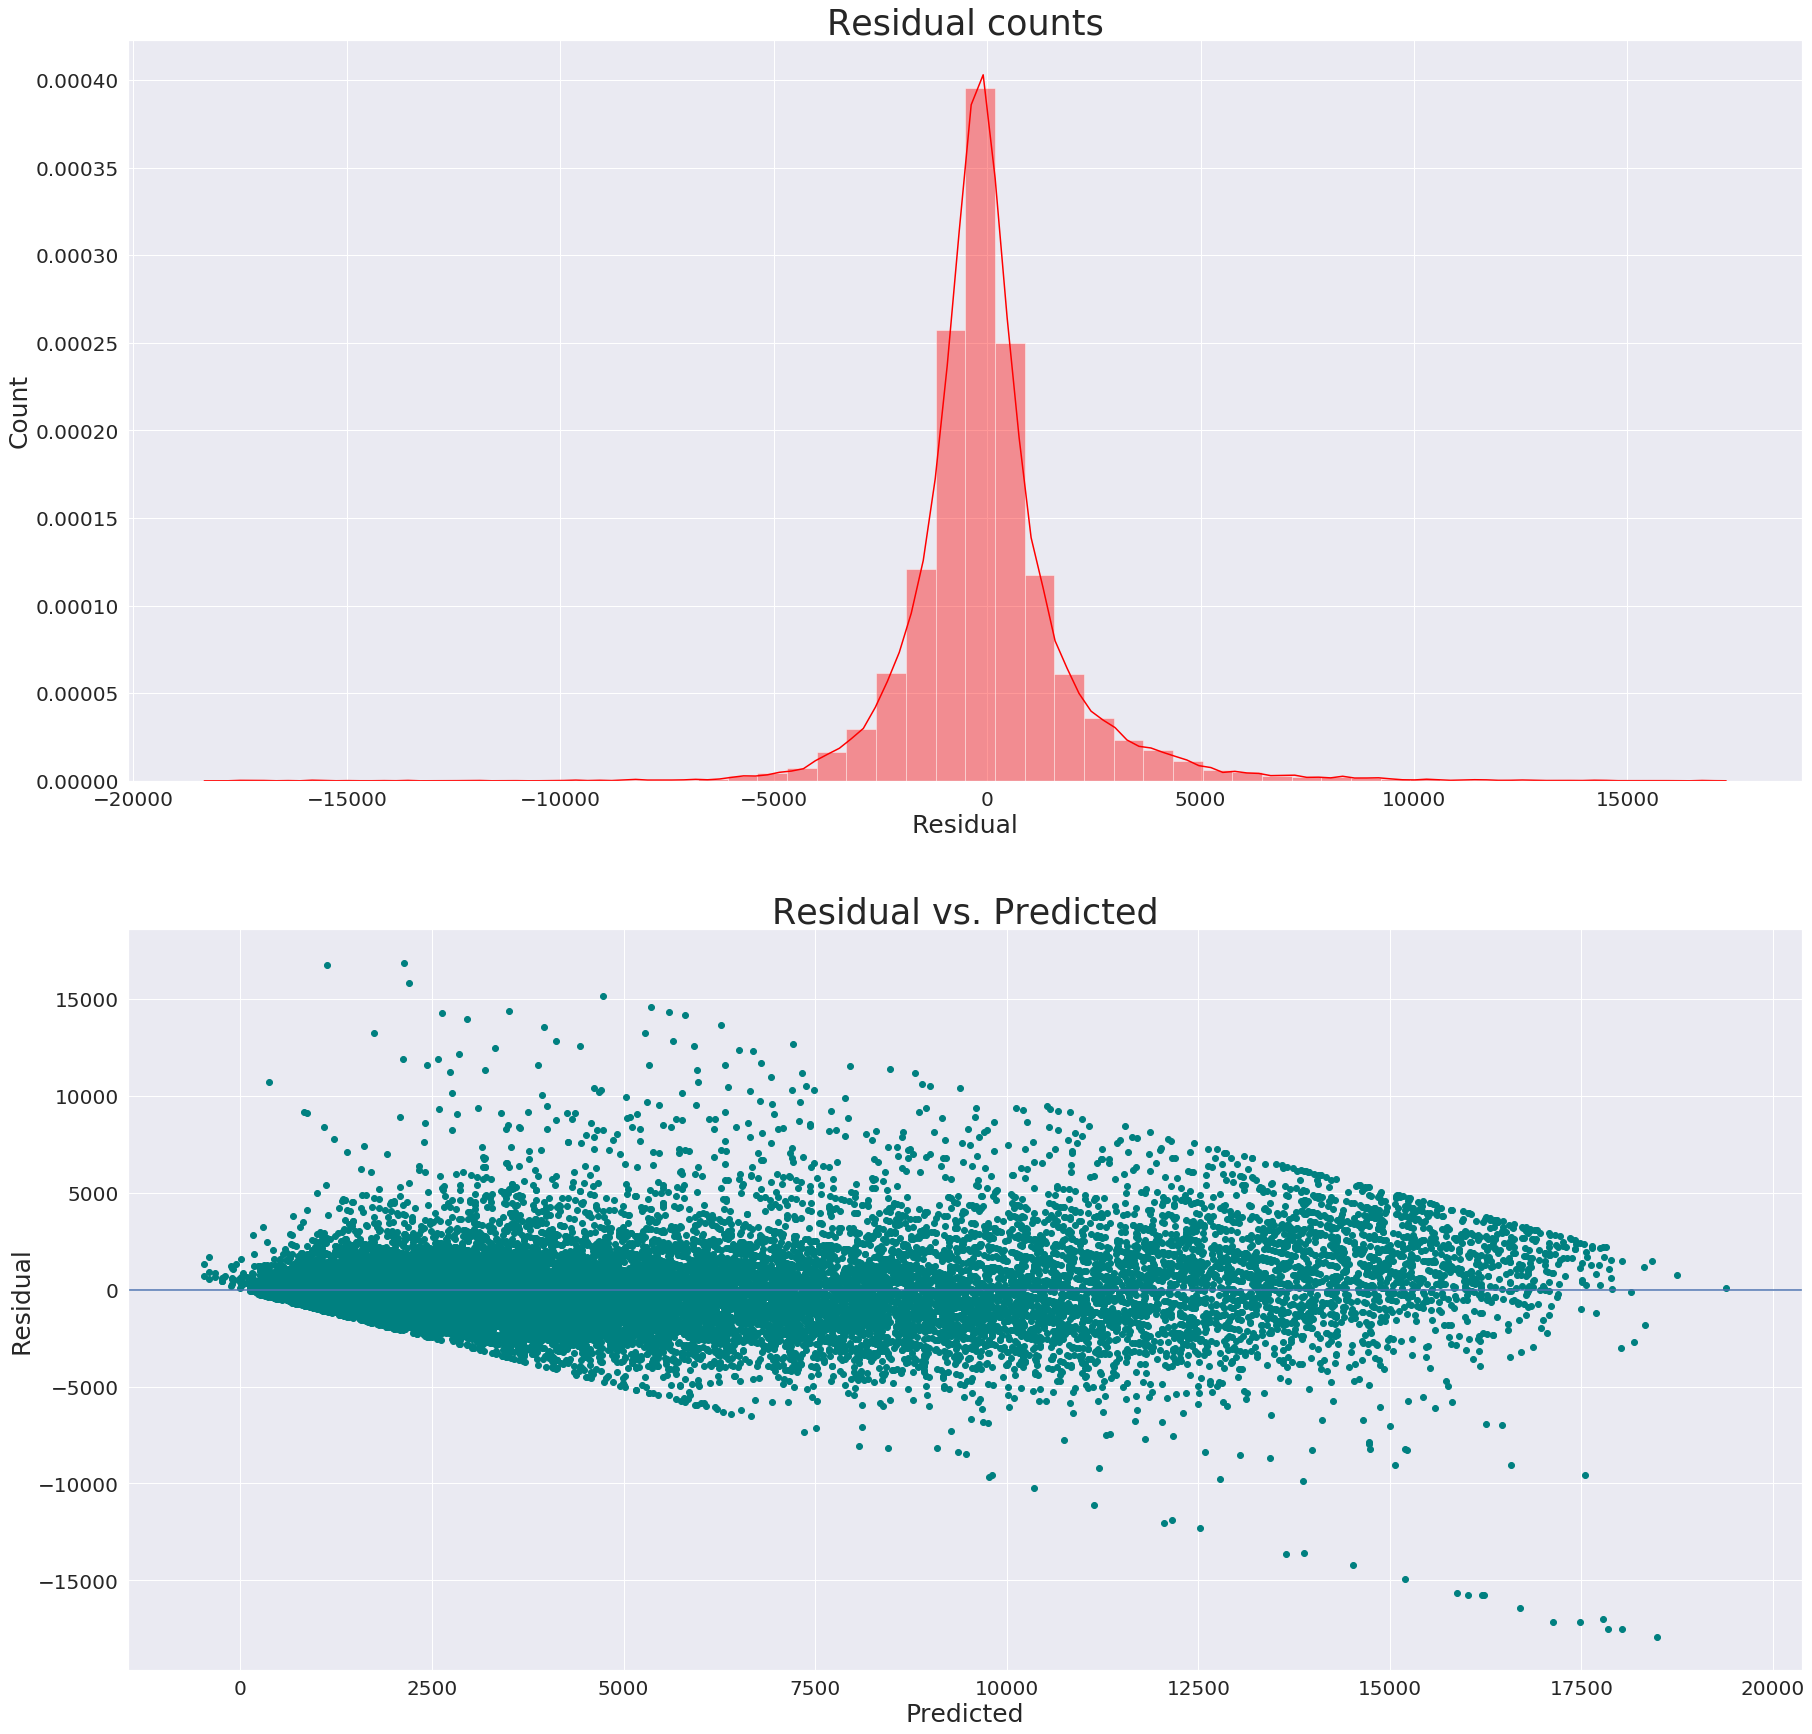

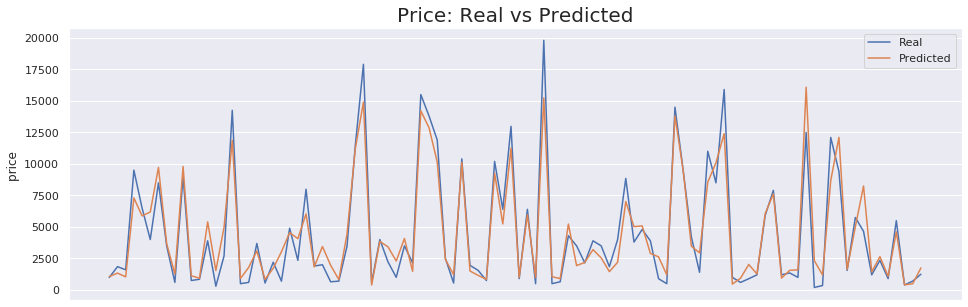

In [38]:
model_visual(y_test.values, y_pred)

<font color='blue'><br>В! Ты чуть ли ни единственный, кто сравнил факт и прогноз... А ведь это сильный инструмент для анализа модели. И остатки - супер.

In [44]:
feature_importances_CatBoostRegressor= pd.Series(model.feature_importances_, index=X_test.columns)
   #.nlargest(7)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u>
<font color='green'><br>ОТЛИЧНО! Ты чуть ли ни единственный, кто сравнил факт и прогноз... А ведь это сильный инструмент для анализа модели. И остатки - супер.

### CatBoostRegressor CV

In [ ]:
param_grid = {
        'learning_rate': [0.03, 0.1],
        'depth': [6, 10],
        'l2_leaf_reg': [3, 5, 7, 9],
        'has_time': [True]        
}

model = CatBoostRegressor(iterations=100, loss_function='RMSE', random_seed=12345)
grid_search_result = model.grid_search(param_grid, 
                                       full_ds,
                                       verbose=0,
                                       partition_random_seed=12345,
                                       search_by_train_test_split=True,
                                       train_size=0.9,
                                       plot=True)

In [ ]:
cv_data = pd.DataFrame(grid_search_result["cv_results"])
best_value = cv_data['test-RMSE-mean'].min()
best_iter = cv_data['test-RMSE-mean'].values.argmin()

print('Best validation RMSE score : {:.4f}±{:.4f} on step {}'.format(
    best_value,
    cv_data['test-RMSE-std'][best_iter],
    best_iter)
)

In [ ]:
model = CatBoostRegressor(iterations=100, loss_function='RMSE', random_seed=12345, **grid_search_result["params"])

start = time.time()
model.fit(train_ds, verbose = 1, eval_set = [(X_test, y_test)], use_best_model=True, plot=True)
training_time = time.time() - start

start = time.time()
y_pred = model.predict(test_ds)
predict_time = time.time() - start

rmse_model  =  rmse_func(y_test, y_pred)

index_table +=1
table.loc[index_table] = ['CatBoostRegressor_CV', rmse_model, training_time, predict_time]
display(table)
model_visual(y_test.values, y_pred)

In [40]:
del(X, y, features, cat_features, X_train, X_test, y_train, y_test, train_ds, test_ds, full_ds, model)

### LGBMRegressor


In [41]:

X = df.drop('Price',axis=1).copy()
y = df['Price'].copy()
features = list(X.columns)
cat_features = list(X[features].select_dtypes('object').columns)
target = 'Price'

  
encoders = dict()
for col in X.select_dtypes('object').columns:
    lbl = LabelEncoder().fit(X[col].values)
    X[col] = lbl.transform(X[col].values)
    encoders[col] = lbl

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)

,name,rmse,training_time,predict_time
1,CatBoostRegressor,1827.321934,105.393274,0.005604
2,LGBMRegressor,1694.649910,12.599283,0.312579


RMSE:
1694.649910099535


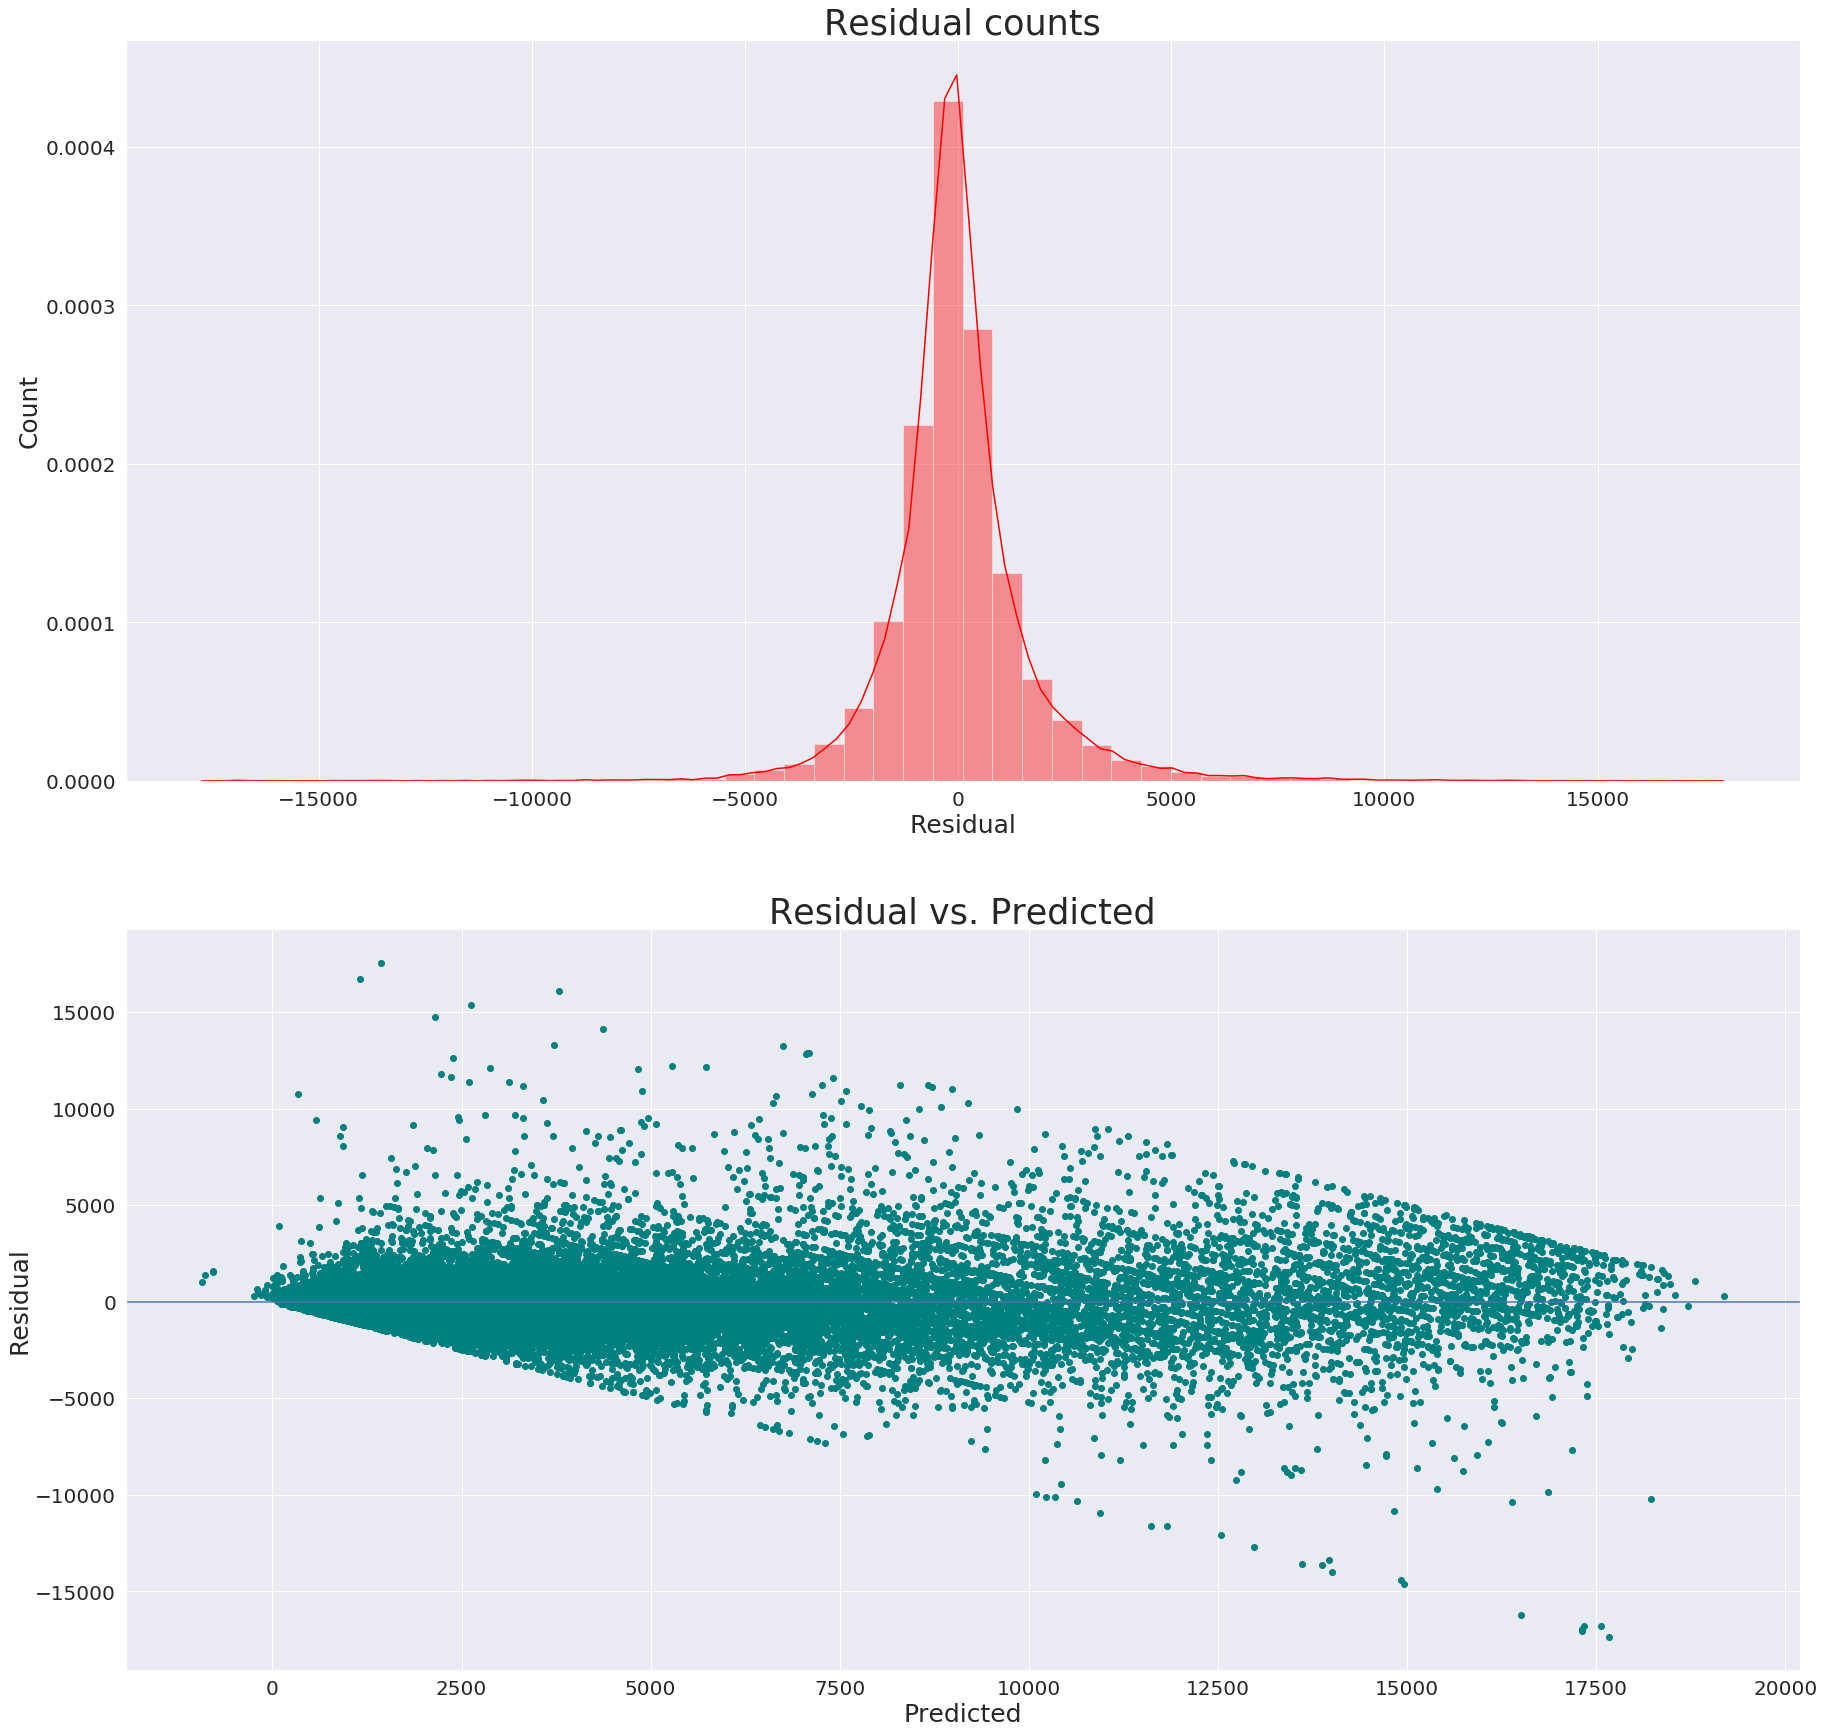

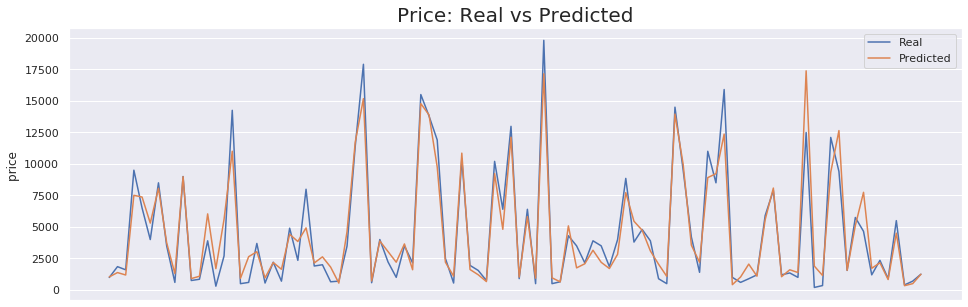

In [42]:
model = LGBMRegressor(objective="RMSE", random_state=12345, verbose=1, force_row_wise=True)

start = time.time()
model.fit(X_train, y_train, eval_metric='rmse', verbose = False, eval_set = [(X_test, y_test)])
training_time = time.time() - start

start = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start

rmse_model  =  rmse_func(y_test, y_pred)

index_table +=1
table.loc[index_table] = ['LGBMRegressor', rmse_model, training_time, predict_time]
display(table)
model_visual(y_test.values, y_pred)

# UPD --------------------------------------------------------------------------------------

feature_importances_LGBMRegressor =pd.Series(model.feature_importances_, index=X_test.columns)
   #.nlargest(7)
   #.plot(kind='barh'))

In [ ]:
param_grid = {
        'learning_rate': [0.03, 0.1],
        'max_depth': [4, 6, 10]
}

model = LGBMRegressor(objective="RMSE", random_state=12345, verbose=0, force_row_wise=True,  num_leaves=20)

grid = GridSearchCV(model,
                        param_grid,
                        cv = 5,
                        n_jobs = 5,
                        verbose=False)

grid.fit(X, y)

print(grid.best_params_)


In [ ]:
model = LGBMRegressor(objective="RMSE", random_state=12345, verbose=0, **grid.best_params_, force_row_wise=True, num_leaves=20 )
start = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start

start = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start

rmse_model  =  rmse_func(y_test, y_pred)

index_table +=1
table.loc[index_table] = ['LGBMRegressor_CV', rmse_model, training_time, predict_time]
display(table)
model_visual(y_test.values, y_pred)


In [ ]:
del(X, y, features, cat_features, X_train, X_test, y_train, y_test, model)

### RandomForestRegressor

In [ ]:

data_ohe = df.copy() # сет данных до OneHotEncoder(OHE/ohe) -кодирования
data_ohe = pd.get_dummies(data_ohe, drop_first = True)
#data_ohe.head()

X = data_ohe.drop('Price',axis=1)
y = data_ohe['Price']

features = list(X.columns)
target = 'Price'

scaler_ohe = StandardScaler()
X = pd.DataFrame(data = scaler_ohe.fit_transform(X), columns = features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345)
del data_ohe

In [ ]:
%%time
model = RandomForestRegressor(n_estimators = 70, max_depth=18, random_state = 12345)

start = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start

start = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start

rmse_model  =  rmse_func(y_test, y_pred)

index_table +=1
table.loc[index_table] = ['RandomForestRegressor', rmse_model, training_time, predict_time]
display(table)
model_visual(y_test.values, y_pred)
feature_importances_RandomForestRegressor= pd.Series(model.feature_importances_, index=X_test.columns)
   #.nlargest(7)


In [ ]:

model = RandomForestRegressor(random_state = 12345)


parametrs_grid = {'n_estimators': range(50, 100, 50),'max_depth' : range(50, 100, 50)}

grid_cv = GridSearchCV(model, parametrs_grid)

grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)

y_pred = grid_cv.predict(X_test)

start = time.time()
grid_cv.fit(X_train, y_train)
training_time = time.time() - start

start = time.time()
y_pred = grid_cv.predict(X_test)
predict_time = time.time() - start

rmse_model  =  rmse_func(y_test, y_pred)

index_table +=1
table.loc[index_table] = ['RandomForestRegressor_CV', rmse_model, training_time, predict_time]
display(table)
model_visual(y_test.values, y_pred)



In [ ]:
del(X, y, features, cat_features, X_train, X_test, y_train, y_test, model, grid_cv)

## Анализ моделей

,name,rmse,training_time,predict_time
1,CatBoostRegressor,1827.321934,115.057413,0.008511


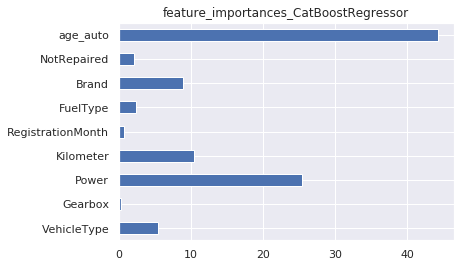

In [45]:
display(table)
feature_importances_CatBoostRegressor .plot(kind='barh', title ='feature_importances_CatBoostRegressor')


In [ ]:
feature_importances_LGBMRegressor.plot(kind='barh', title ='feature_importances_LGBMRegressor')

In [ ]:
feature_importances_RandomForestRegressor.plot(kind='barh', title ='feature_importances_RandomForestRegressor')

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></font><br />
<font color='green'>ОК, Евгений. Не стал всё запускать. По catboost видно, что всё работает как надо)<br>
Спасибо за проект) УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/>Евгений, крепкая суперработа<br>
Прочитав её до конца хочется добавить: ..."А по сему и делу конец), как говорится" <br>
Мне было интерено двигаться от блока к блоку, читать размышления, код и выводы.<br>
При этом оформление выводов такое же последовательное и адекватное.<br>
В целом, ты не забыла поисследовать данные, и достаточно разносторонне поработать с моделями.<br>
    
<font color='green'>
Если говорить, что можно ещё улучшить в подобных проектах, то я бы выделили такие моменты:<br>    
1) Для понимания, а какие в итоге факторы важны при моделировании, можно выводить их важность, использую feature_importances_, ну и график заодно. Это будет смотреться очнь здорово: результативная метрика и график важности факторов)))<br>  
    
2) предварительная работа с данными:<br>
- На этом этапе нужно БОЛЬШЕ аргументации, для принимаемых решений.<br>
- Также, можно организовать для себя некую систему работы с данными:<br>
 
Например, алгоритм такой может:<br>
а) анализ аномалий: количественные и категориальные переменные <br>
б) анализ пропусков: количественные и категориальные переменные<br>
в) проверка дубликатов<br>
г) Анализ факторов: исходя из типа шкалы, могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
    
3) Можно попробовать провести анализ остатков. Вычислить разницу между прогноз-факт и посмотерть что и как можедель чаще всего хорошо/плохо предсказывает.<br>
4) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, суперретро, старая, новаоя... надо пдумать..) ну и попробовать новую модель (этопросто на обчуждение). А может, по каждому кластеру - вообще своя модель...<br>
    
    
<font color='red'>
Что ещё лучше сделать в этой работе:<br>
Очень здорово будет, если найдёшь возможность сделать график важности факторов. Это необходимая вещь для финалной части любой модельной работы.<br>
<font color='green'> 
Выводить множество результатов в единую таблицу - хороший тон). Я её видел в конце.. Но не смог дождаться когда последняя модель досчитает, уже около 2-х часов прошло..... ограничения на сервере..<br>
<br>
Спасибо) БУДУ ЖДАТЬ КОММЕНТАРИЕВ!

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей